# Finance Data Project
----
In this data project I will be focusing on exploratory data analysis of stock prices.

I have focused on bank stocks in this project and observed how they progressed from 2014 all the way to early 2024.

## Data

for this project, I will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

## Getting the data

I used pandas-datareader to read data from stooq finanace using pandas library.

In [39]:
#loading the libraries
import os
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2024, 1, 1)

In [10]:
# Bank of America
BAC = web.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = web.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = web.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = web.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = web.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = web.DataReader("WFC", 'stooq', start, end)

In [11]:
df = web.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

In [12]:
#Creating a list of the ticker symbols (as strings) in alphabetical order. let's Call this list: tickers
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [13]:
# concatenate the bank dataframes together to a single data frame called bank_stocks
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [14]:
#set the column name levels
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [15]:
bank_stocks.head()

Bank Ticker    BAC                                          C           \
Stock Info    Open    High      Low  Close      Volume   Open     High   
Date                                                                     
2023-12-29   33.94  33.995  33.5500  33.67  28060739.0  51.56  51.6050   
2023-12-28   33.82  33.970  33.7700  33.88  21799559.0  51.40  51.7950   
2023-12-27   33.80  33.950  33.6600  33.84  24498581.0  51.14  51.5800   
2023-12-26   33.45  33.960  33.3715  33.86  24845437.0  50.88  51.5275   
2023-12-22   33.21  33.670  33.2000  33.43  37265860.0  50.73  51.2600   

Bank Ticker                             ...     MS                           \
Stock Info      Low  Close      Volume  ...   Open     High      Low  Close   
Date                                    ...                                   
2023-12-29   51.215  51.44  13149408.0  ...  93.49  93.7700  93.0600  93.25   
2023-12-28   51.400  51.52  10218453.0  ...  93.31  93.9501  93.2400  93.64   
2023-12-27   50.930  51.46   9901341.0  ...  92.69  93.6900  92.4004  93.66   
2023-12-26   50.790  51.34  11501461.0  ...  92.61  93.0200  92.3700  92.84   
2023-12-22   50.690  50.86  14440560.0  ...  92.90  93.6600  92.2324  92.41   

Bank Ticker               WFC                                    
Stock Info      Volume   Open    High    Low  Close      Volume  
Date                                                             
2023-12-29   4772283.0  49.35  49.575  49.21  49.22  11733578.0  
2023-12-28   4089529.0  49.14  49.650  49.09  49.48   9872634.0  
2023-12-27   4073222.0  49.41  49.565  49.15  49.33  12536734.0  
2023-12-26   2726286.0  49.16  49.670  49.03  49.64   8856695.0  
2023-12-22   5800929.0  49.66  49.860  49.09  49.18  10450410.0  

[5 rows x 30 columns]

## Exploratory Data Analysis (EDA)

In [16]:
# max Close price for each bank's stock throughout the time period
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     48.2567
C       75.6568
GS     410.7930
JPM    170.3000
MS     105.7610
WFC     57.9642
dtype: float64

In [17]:
# Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.
returns = pd.DataFrame()

In [18]:
# Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-28,0.006237,0.001555,0.001659,0.001176,0.004182,0.005282
2023-12-27,-0.001181,-0.001165,-0.004995,-0.005285,0.000214,-0.003032
2023-12-26,0.000591,-0.002332,-0.007465,-0.005962,-0.008755,0.006284
2023-12-22,-0.012699,-0.009349,-0.002516,-0.005879,-0.004632,-0.009267


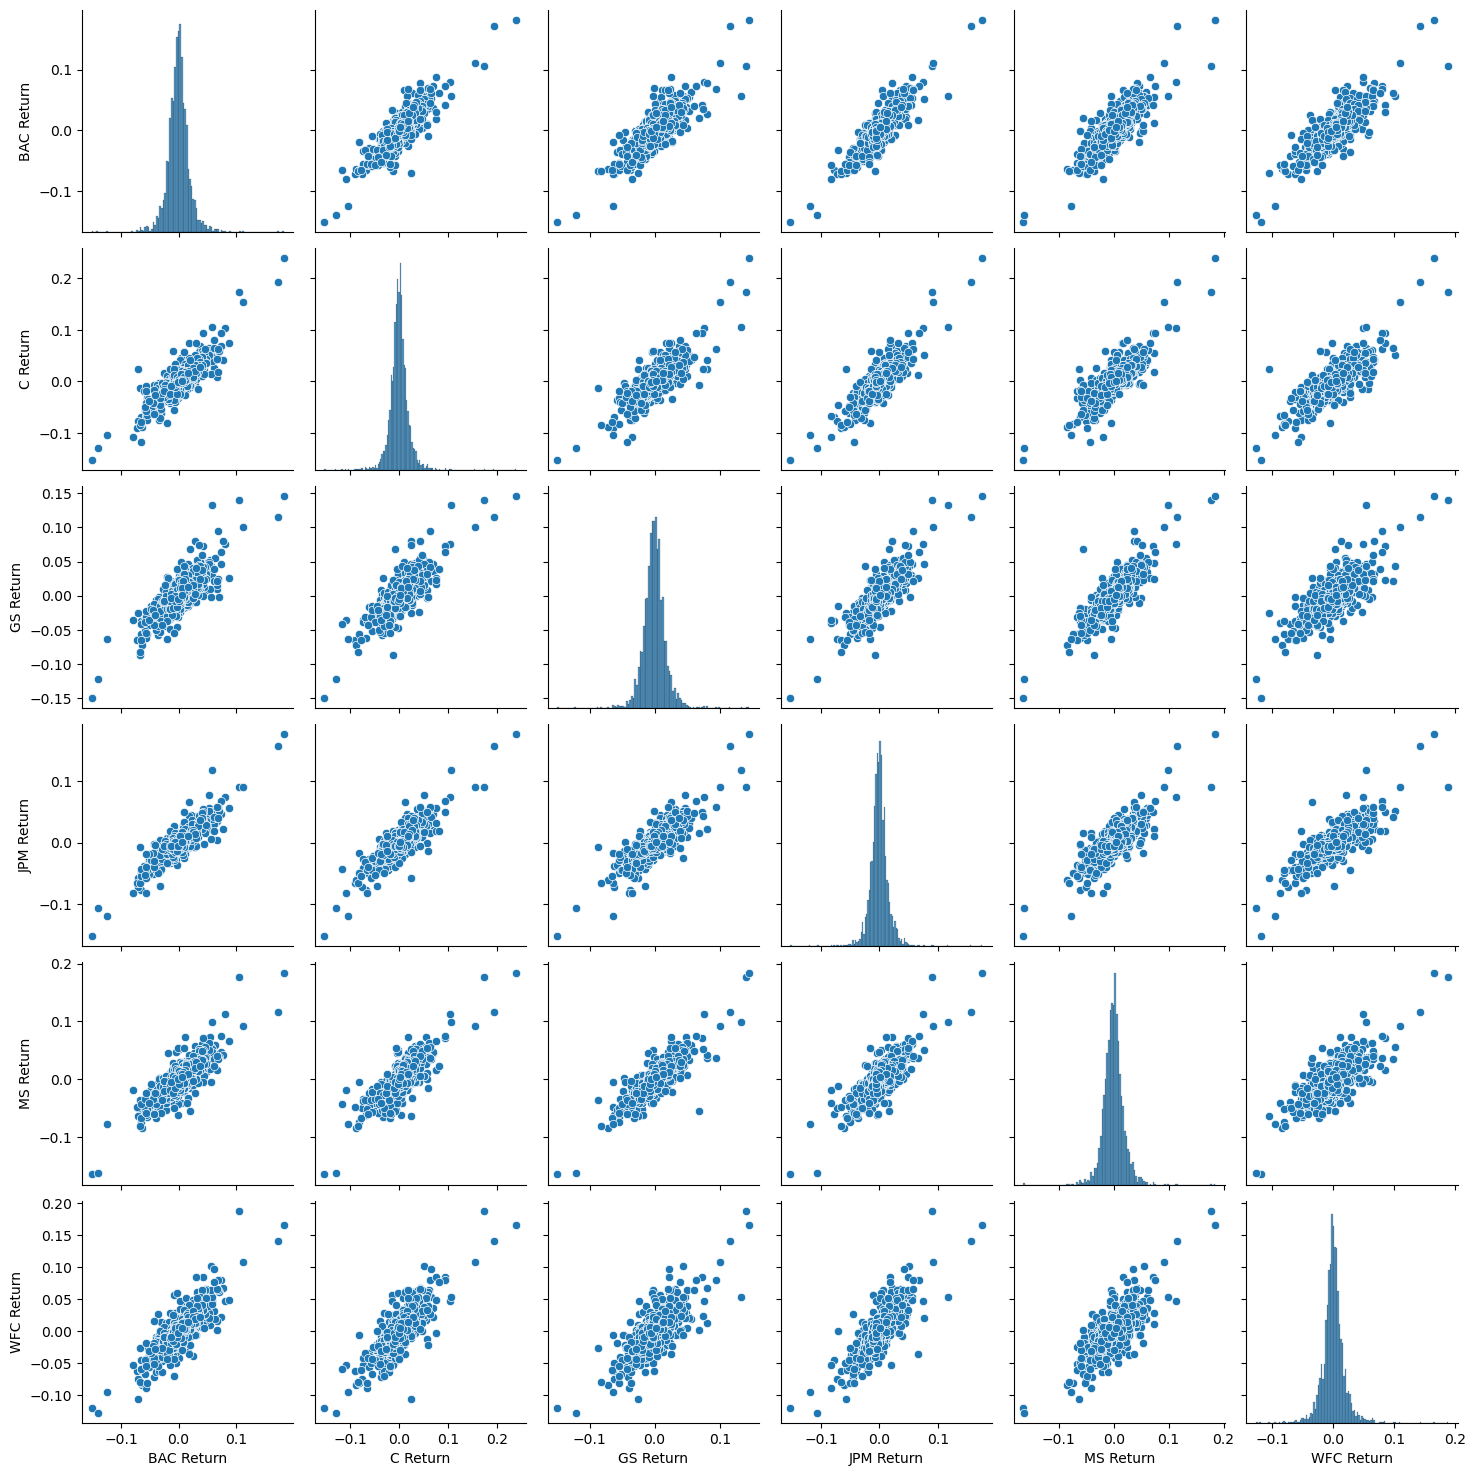

In [27]:
# pairplot of the returns dataframe
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [21]:
# Worst Drop
returns.idxmin()

BAC Return   2020-03-12
C Return     2020-03-12
GS Return    2020-03-12
JPM Return   2020-03-12
MS Return    2020-03-12
WFC Return   2020-03-23
dtype: datetime64[ns]

In [22]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-11
dtype: datetime64[ns]

We could notice that all bank's largest drop and biggest gain were very close to one another and in 2020. Since all the banks are seem be affected, I think the covid could be the reason. 

In [23]:
returns.std() # Citigroup riskiest

BAC Return    0.019558
C Return      0.020580
GS Return     0.017813
JPM Return    0.016972
MS Return     0.019503
WFC Return    0.019260
dtype: float64

In [26]:
returns.sort_index(inplace=True)
returns.loc['2023-01-01':'2023-12-31'].std() # Very similar risk profiles, but WFC or Morgan Stanley

BAC Return    0.016935
C Return      0.016087
GS Return     0.015301
JPM Return    0.013114
MS Return     0.016283
WFC Return    0.017561
dtype: float64

C:\Users\manoj\AppData\Local\Temp\ipykernel_7104\2156010278.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MS Return', ylabel='Density'>

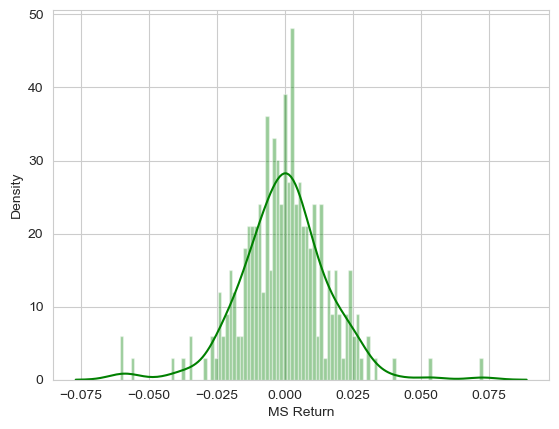

In [31]:
# distplot of the 2015 returns for Morgan Stanley
sns.distplot(returns.loc['2023-01-01':'2023-12-31']['MS Return'],color='green',bins=100)

C:\Users\manoj\AppData\Local\Temp\ipykernel_7104\310186647.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='C Return', ylabel='Density'>

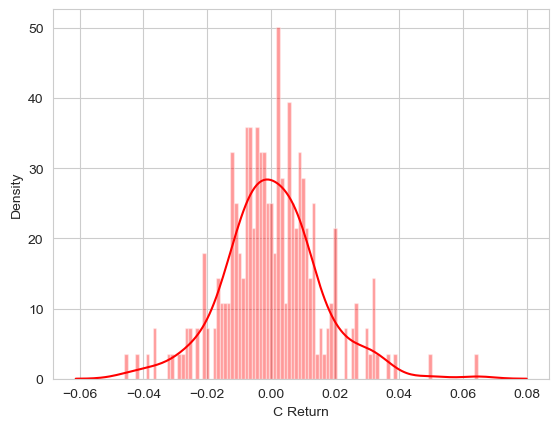

In [32]:
 # Create a distplot of the 2008 returns for CitiGroup
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['C Return'],color='red',bins=100)

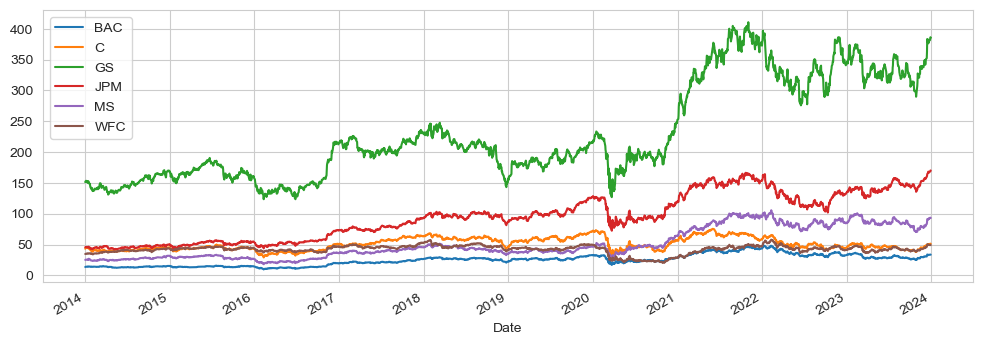

In [33]:
# Close price for each bank for the entire index of time
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: xlabel='Date'>

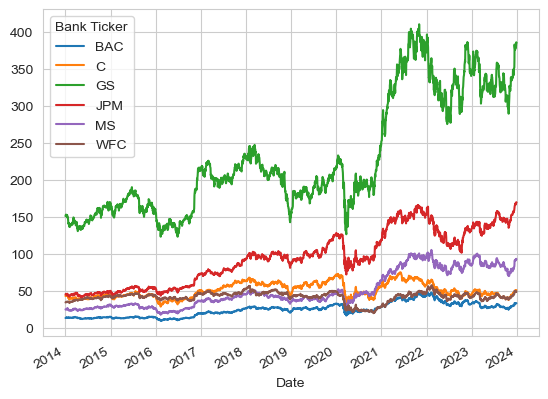

In [34]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

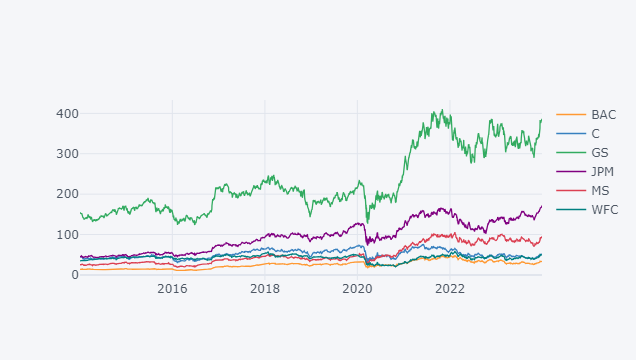

In [35]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

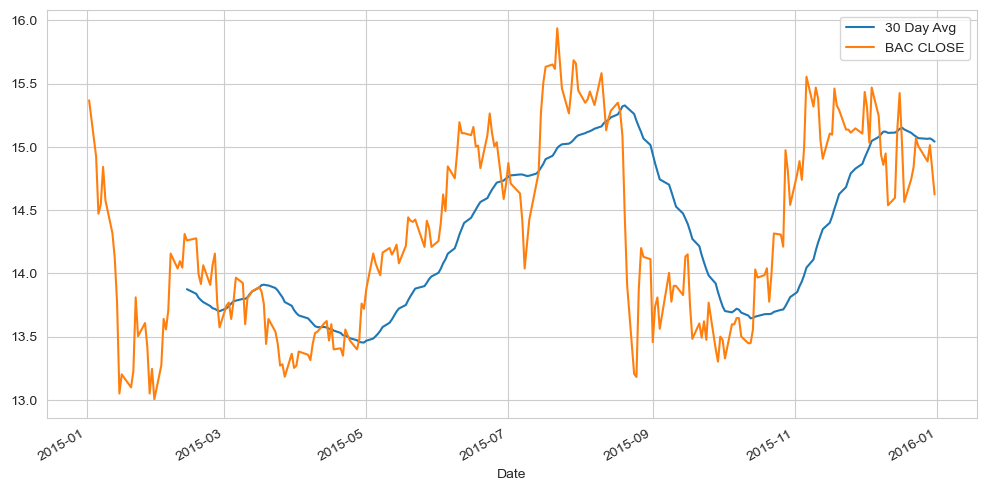

In [42]:
# 30 day average against the Close Price for Bank Of America's stock for the year 2015

if not BAC.index.is_monotonic_increasing:
    BAC = BAC.sort_index()

plt.figure(figsize=(12,6))
BAC['Close'].loc['2015-01-01':'2016-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2015-01-01':'2016-01-01'].plot(label='BAC CLOSE')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

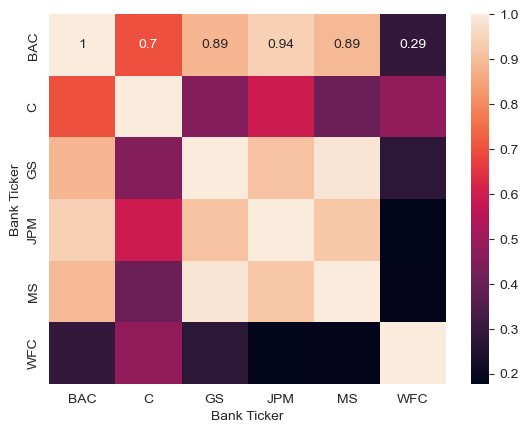

In [43]:
# correlation heatmap between the stocks Close Price
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

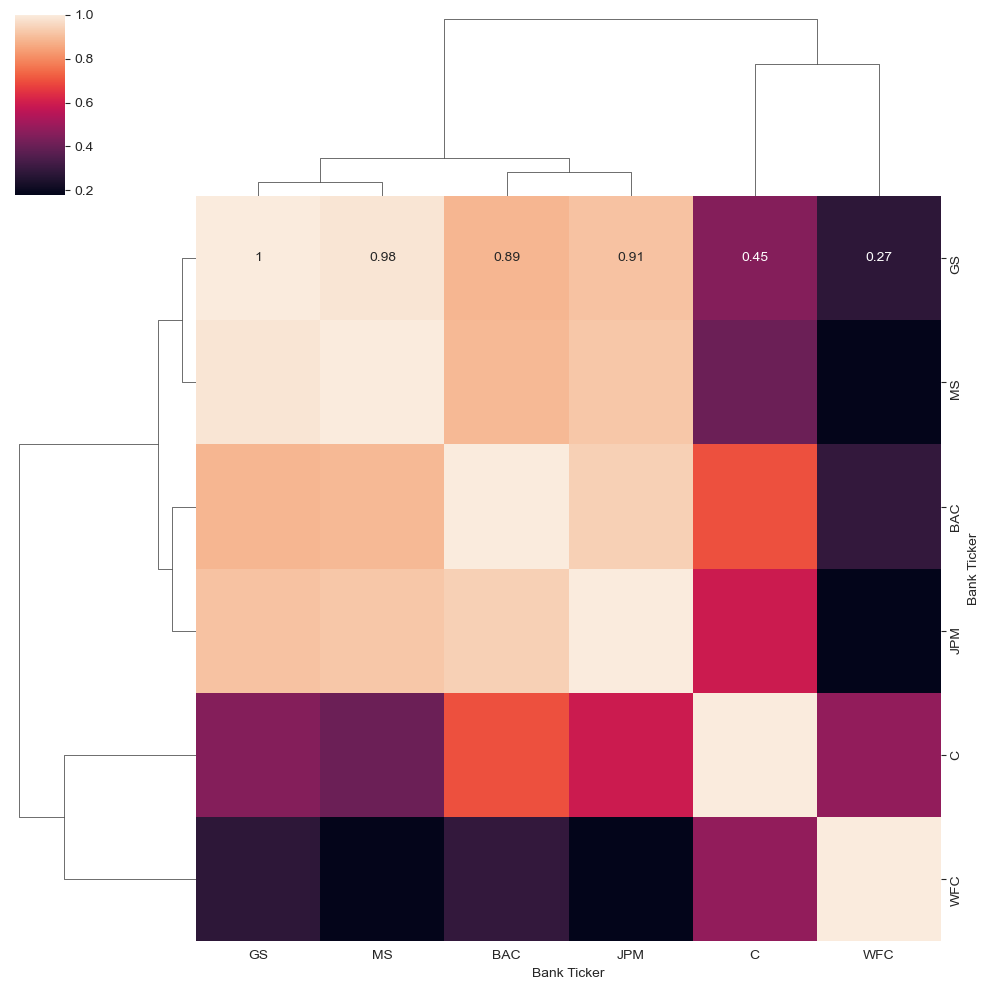

In [44]:
# seaborn's clustermap to cluster the correlations together
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

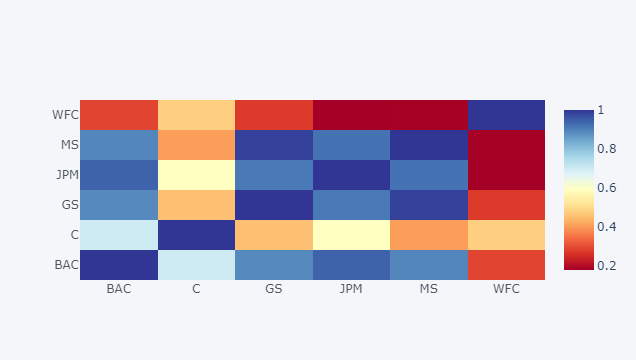

In [45]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

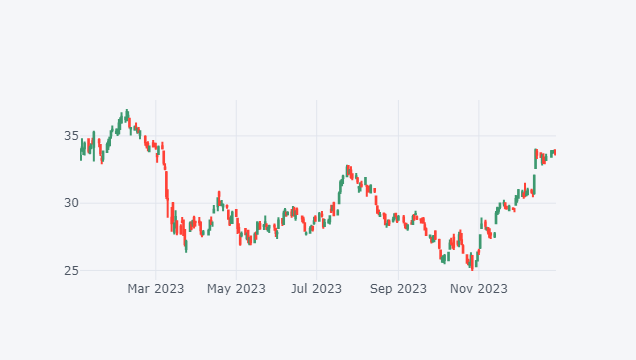

In [49]:
# Candle plot of Bank of America's stock from Jan 1st 2023 to Jan 1st 2024
BAC[['Open', 'High', 'Low', 'Close']].loc['2023-01-01':'2024-01-01'].iplot(kind='candle')

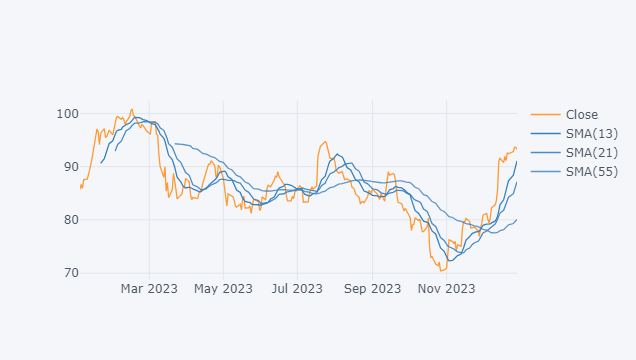

In [50]:
# Simple Moving Averages plot of Morgan Stanley for the year 2023.
if not MS.index.is_monotonic_increasing:
 MS = MS.sort_index()
    
MS['Close'].loc['2023-01-01':'2024-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

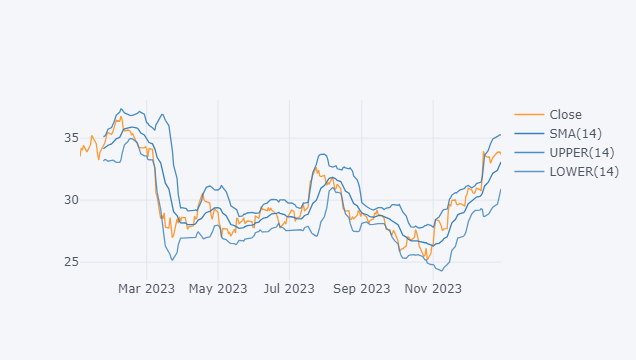

In [51]:
# Bollinger Band Plot for Bank of America for the year 2023
BAC['Close'].loc['2023-01-01':'2024-01-01'].ta_plot(study='boll')

## Completed!